In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.metrics import make_scorer

import graphviz

from sklearn.metrics import fbeta_score


from sklearn.model_selection import cross_val_score,  StratifiedKFold


import xgboost as xgb
from sklearn.metrics import f1_score

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_T.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [4]:
train_df['scale'].value_counts()

T1    496
T3    327
T2    132
Name: scale, dtype: int64

In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)


In [7]:
caly_label_2=[]
for x in caly_label:
    if x=='T1':
        caly_label_2.append(0)
    elif x=='T2':
        caly_label_2.append(1)
    elif x=='T3':
        caly_label_2.append(2)
    else:
        print("LOL",x)

In [8]:
caly_label_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
caly_label=caly_label_2

## Dobieranie parametrów part 1

In [10]:
ftwo_scorer = make_scorer(f1_score,greater_is_better=True, average='macro')

In [11]:
param_grid = {

    'subsample':[0.5,1],
    'colsample_bytree':[0.5,1],
    'n_estimators':[100,500],
    'eta':[0.1,0.3],
    'gamma':[0,5],
    'max_depth':[2, 6, 10], 
    'min_child_weight':[0.5,1,2],
    'max_delta_step':[1,5,10],
    
}

In [13]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=1,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 7, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
          

In [14]:
grid_search_2.best_score_#0.11579231045634207

0.5130881681770338

In [15]:
grid_search_2.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.1,
 'gamma': 0,
 'max_delta_step': 1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 0.5}

## Dobieranie parametrów part 2

In [16]:
param_grid = {

    'subsample':[0.3,0.5,0.7], #
    'colsample_bytree':[0.5,0.7,1], 
    'n_estimators':[500], ##
    'eta':[0.1,0.2], 
    'gamma':[0,2,4], 
    'max_depth':[10,14, 18], 
    'min_child_weight':[0.7,1,1.5], 
    'max_delta_step':[1,2,3] 
    
}

In [19]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
          

In [20]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.1,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=2, max_depth=18, min_child_weight=1.5, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=2, nthread=2,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [21]:
grid_search_2.best_score_

0.5144088421165639

In [22]:
grid_search_2.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.1,
 'gamma': 0,
 'max_delta_step': 2,
 'max_depth': 18,
 'min_child_weight': 1.5,
 'n_estimators': 500,
 'subsample': 0.5}

In [23]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.1,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=2, max_depth=18, min_child_weight=1.5, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=2, nthread=2,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

## Dobieranie parametrów part 3

In [24]:
param_grid = {

    'subsample':[0.4,0.5,0.6], #
    'colsample_bytree':[0.7], 
    'n_estimators':[500], ##
    'eta':[0.1], 
    'gamma':[0], 
    'max_depth':[18,24,30], 
    'min_child_weight':[1.5,2], 
    'max_delta_step':[2] 
    
}

In [27]:
XGB_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',nthread=2,random_state=42)
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
          

In [28]:
grid_search_2.best_score_

0.5144088421165639

In [29]:
grid_search_2.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.1,
 'gamma': 0,
 'max_delta_step': 2,
 'max_depth': 18,
 'min_child_weight': 1.5,
 'n_estimators': 500,
 'subsample': 0.5}

In [30]:
grid_search_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.1,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=2, max_depth=18, min_child_weight=1.5, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=2, nthread=2,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

## Cross-walidacja

In [31]:
caly_label=np.array(caly_label)

In [32]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.1,
              eval_metric='logloss', gamma=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=2, max_depth=18, min_child_weight=1.5,
              monotone_constraints='()', n_estimators=500, n_jobs=2, nthread=2,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
    
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=f1_score(caly_label[test], predykcje,average='macro')
    wart_2.append(blad)
    licznik+=1

In [33]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_T_XGB.csv')

In [34]:
wart_2

[0.4810406381613812,
 0.448280701754386,
 0.47143534833288153,
 0.5179694229112835,
 0.42965641130590987]

In [35]:
sum(wart_2)/len(wart_2) #0.032977654217233775

0.46967650449316845

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [38]:
import seaborn as sns

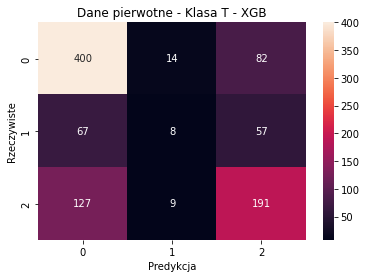

In [39]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa T - XGB')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
f1score=f1_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], average='macro')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.484
Precision: 0.503
F1score: 0.471
